In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def get_firing_rate_distr(N, eta, Delta, tau):
    
    # sample from lorentzian distribution of excitabilities
    neurons = np.arange(1, N+1)
    etas = eta + Delta*np.tan(0.5*np.pi*(2.0*neurons - N - 1)/(N+1))
    
    # calculate firing rate from excitability distribution
    rates = np.zeros_like(etas)
    idx = etas > 0
    etas_tmp = etas[idx]
    rates[idx] = 1e3*np.sqrt(etas_tmp)/(tau*np.pi)
    return rates

In [38]:
# QIF parameters
N = 100000

# STN parameters
eta_e = 17.0
Delta_e = 1.0
tau_e = 13.0

# GPe parameters
eta_i = 25.0
Delta_i = 3.0
tau_i = 16.0

In [39]:
# calculate population firing rate distributions
fr_e = get_firing_rate_distr(N, eta_e, Delta_e, tau_e)
fr_i = get_firing_rate_distr(N, eta_i, Delta_i, tau_i)

Text(0.5, 1.0, 'GPe firing rate distribution')

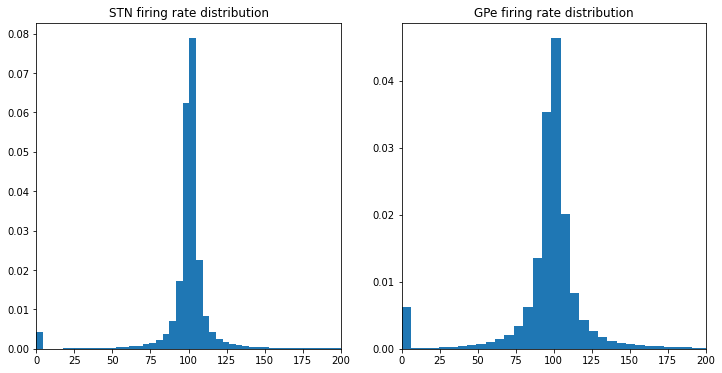

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# histogram parameters
n_bins = 1000
histtype = 'bar'
density = True

# plot STN firing rate distribution
ax1 = axes[0]
ax1.hist(fr_e, n_bins, density=density, histtype=histtype)
ax1.set_xlim([0, 200])
ax1.set_title('STN firing rate distribution')

# plot GPe firing rate distribution
ax2 = axes[1]
ax2.hist(fr_i, n_bins, density=density, histtype=histtype)
ax2.set_xlim([0, 200])
ax2.set_title('GPe firing rate distribution')

In [41]:
# calculate firing rate distribution statistics
mean_e = np.mean(fr_e)
std_e = np.var(fr_e)
mean_i = np.mean(fr_i)
std_i = np.var(fr_i)

# display statistics
print(f"Mean of STN firing rate: {mean_e} Hz")
print(f"STD of STN firing rate: {std_e} Hz")
print(f"Mean of GPe firing rate: {mean_i} Hz")
print(f"STD of GPe firing rate: {std_i} Hz")

Mean of STN firing rate: 100.93662076490013 Hz
STD of STN firing rate: 1361.1007526844428 Hz
Mean of GPe firing rate: 99.56130587692438 Hz
STD of GPe firing rate: 2938.869186184974 Hz
